# Importing libraries and setting up functions

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

%matplotlib inline

In [5]:
# takes a SQL query as an argument and returns a pandas dataframe of that query
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

# takes a SQL command as an argument and executes it using the sqlite module
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

# calls the run_query() function to return a list of all tables and views in the database
def show_tables():
    return run_query("SELECT name, type FROM sqlite_master WHERE type IN ('table','view');")

print(show_tables())

              name   type
0            album  table
1           artist  table
2         customer  table
3         employee  table
4            genre  table
5          invoice  table
6     invoice_line  table
7       media_type  table
8         playlist  table
9   playlist_track  table
10           track  table


# Selecting Albums to purchase
<ol>
<li>Write a query that returns each genre, with the number of tracks sold in the USA:
<ul><li>in absolute numbers
<li>in percentages.</ul>
<li>Create a plot to show this data.
<li>Write a paragraph that interprets the data and makes a recommendation for the three artists whose albums we should purchase for the store, based on sales of tracks from their genres.
</ol>

In [15]:
# Setting up the desired query

albums_purchased_query = """
WITH usa_tracks_purchased as (
        select il.* from invoice_line il
        INNER JOIN invoice i on i.invoice_id = il.invoice_id
        INNER JOIN customer c on i.customer_id = c.customer_id
        WHERE c.country = "USA"
        )

SELECT g.name genre,
       count(utp.invoice_line_id) as number_sold,
       cast(count(utp.invoice_line_id) as float) / (
           select count(*) from usa_tracks_purchased
       ) as percent_sold
       from usa_tracks_purchased utp 
       INNER JOIN track t on t.track_id = utp.track_id
       INNER JOIN genre g on g.genre_id = t.genre_id
       GROUP BY 1
       ORDER BY 2 DESC;
        """

# Executing the query to data frame
usa_tracks_purchased = run_query(albums_purchased_query)
print(usa_tracks_purchased)

                 genre  number_sold  percent_sold
0                 Rock          561      0.533777
1   Alternative & Punk          130      0.123692
2                Metal          124      0.117983
3             R&B/Soul           53      0.050428
4                Blues           36      0.034253
5          Alternative           35      0.033302
6                Latin           22      0.020932
7                  Pop           22      0.020932
8          Hip Hop/Rap           20      0.019029
9                 Jazz           14      0.013321
10      Easy Listening           13      0.012369
11              Reggae            6      0.005709
12   Electronica/Dance            5      0.004757
13           Classical            4      0.003806
14         Heavy Metal            3      0.002854
15          Soundtrack            2      0.001903
16            TV Shows            1      0.000951


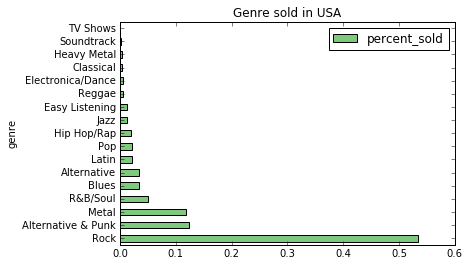

In [27]:
# Creating plot to show the dataset
usa_tracks_purchased.plot(
    kind="barh",
    x="genre",
    y="percent_sold",
    use_index=True,
    title="Genre sold in USA",
    colormap=plt.cm.Accent
)

From the plot, it can be seen that tracks that are of Rock genre are sold out the most and TV show tracks are not much of a sale. Rock tracks make up more than 50 % of the sales. The tracks recommended for the three authors are - 

1. Meteor and the Girls
2. Red Tone
3. Slim Jim Bites 

This makes up about 17% of the total sales

# Analyzing Employee sales performance

1. Write a query that finds the total dollar amount of sales assigned to each sales support agent within the company. Add any extra attributes for that employee that you find are relevant to the analysis.
2. Create a plot of the results of your query.
3. Write a short statement describing your results, and providing a possible interpretation.

In [49]:
# Setting up the desired queries

employee_sales_performance_query = """ SELECT 
                                            e.first_name || ' ' || e.last_name as employee_name,
                                            e.hire_date hire_date, 
                                            SUM(i.total) total_sales_amt from employee e inner join customer c
                                            on e.employee_id = c.support_rep_id inner join invoice i
                                            on i.customer_id = c.customer_id
                                            group by 1
                                    """

# Running the results
employee_sales = run_query(employee_sales_performance_query)
print(employee_sales)

   employee_name            hire_date  total_sales_amt
0   Jane Peacock  2017-04-01 00:00:00          1731.51
1  Margaret Park  2017-05-03 00:00:00          1584.00
2  Steve Johnson  2017-10-17 00:00:00          1393.92


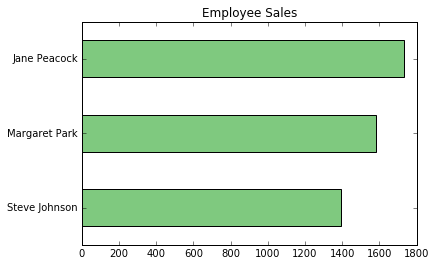

In [50]:
# Plotting the data frame
employee_sales.set_index("employee_name", drop=True, inplace=True)
employee_sales.sort_values("total_sales_amt", inplace=True)

employee_sales.plot(
    kind="barh",
    legend=False,
    title='Employee Sales',
    colormap=plt.cm.Accent
)

plt.ylabel("")

Jane Peacock makes the most number of sales in dollars compared to the other 2 employees. This may be due to the fact that the other two employees are hired later than Jane.